In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv("/Users/gsb/Downloads/titanic/train.csv")
test = pd.read_csv("/Users/gsb/Downloads/titanic/test.csv")

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train['Age'].fillna(train['Age'].median(), inplace=True)

/var/folders/nj/kh48nbb16_l1xsk_12fz8v5c0000gn/T/ipykernel_88147/486169235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [12]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

/var/folders/nj/kh48nbb16_l1xsk_12fz8v5c0000gn/T/ipykernel_88147/1031565505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [14]:
test['Cabin'].fillna('Unknown', inplace=True)

In [15]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [16]:
bins = [0, 12, 18, 60, 120]
labels = ['Child', 'Teen', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

In [17]:
train[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [19]:
survival_by_sex_class_age = train.groupby(['Sex', 'Pclass', 'AgeGroup'])['Survived'].mean().reset_index()
survival_by_sex_class_age

/var/folders/nj/kh48nbb16_l1xsk_12fz8v5c0000gn/T/ipykernel_88147/3275380806.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_sex_class_age = train.groupby(['Sex', 'Pclass', 'AgeGroup'])['Survived'].mean().reset_index()


,Sex,Pclass,AgeGroup,Survived
0,female,1,Child,0.000000
1,female,1,Teen,1.000000
2,female,1,Adult,0.975309
3,female,1,Senior,1.000000
4,female,2,Child,1.000000
5,female,2,Teen,1.000000
6,female,2,Adult,0.903226
7,female,2,Senior,NaN
8,female,3,Child,0.478261
9,female,3,Teen,0.550000


In [20]:
corr_matrix = train.corr(numeric_only=True)

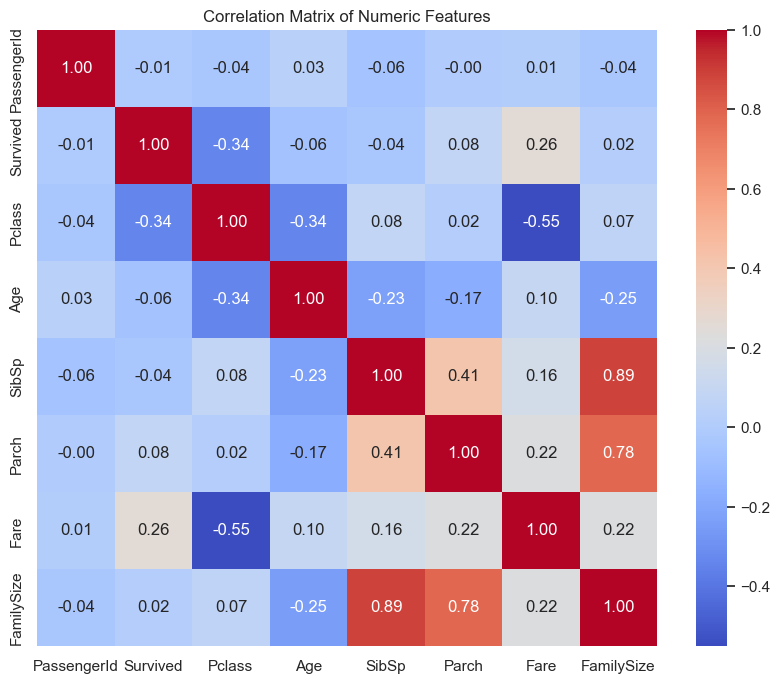

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [22]:
#correlations_with_survival = corr_matrix['Survived'].sort_values(ascending=False)
#orrelations_with_survival

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

In [23]:
encoded = train.copy()
encoded['Sex'] = encoded['Sex'].astype('category').cat.codes
encoded['Embarked'] = encoded['Embarked'].astype('category').cat.codes
encoded['AgeGroup'] = encoded['AgeGroup'].astype('category').cat.codes


cat_corr = encoded.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
cat_corr

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
AgeGroup      -0.127599
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

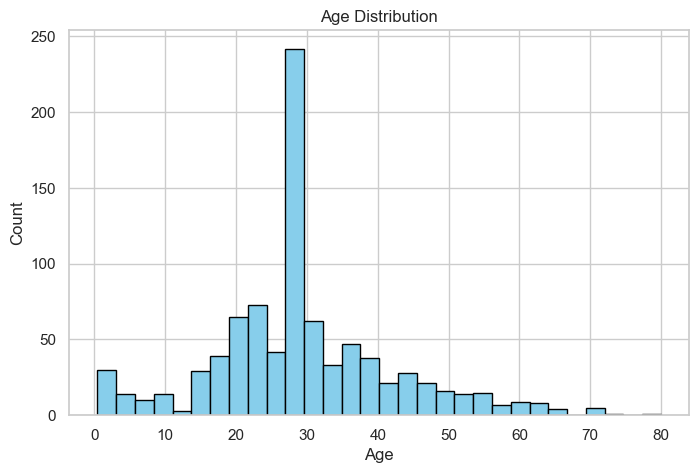

In [28]:
plt.figure(figsize=(8,5))
plt.hist(train['Age'], bins=30, edgecolor='black', color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

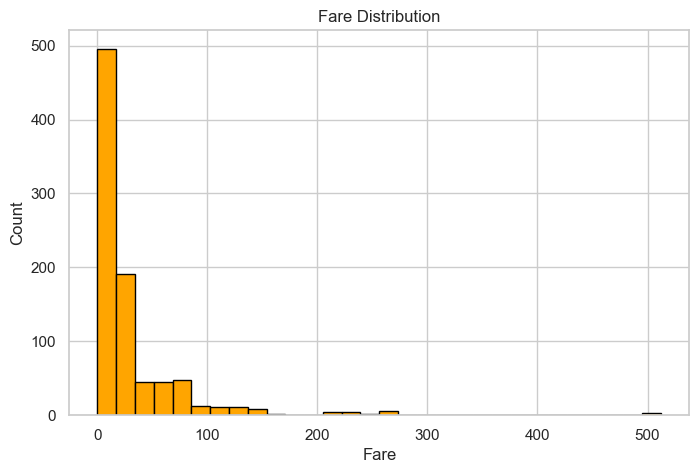

In [32]:
plt.figure(figsize=(8,5))
plt.hist(train['Fare'], bins=30, edgecolor='black', color='orange')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

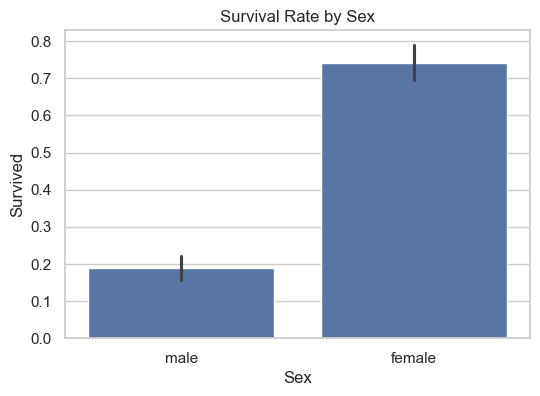

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Sex")
plt.show()

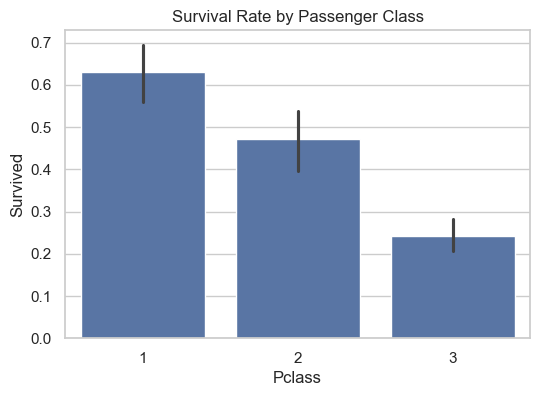

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()

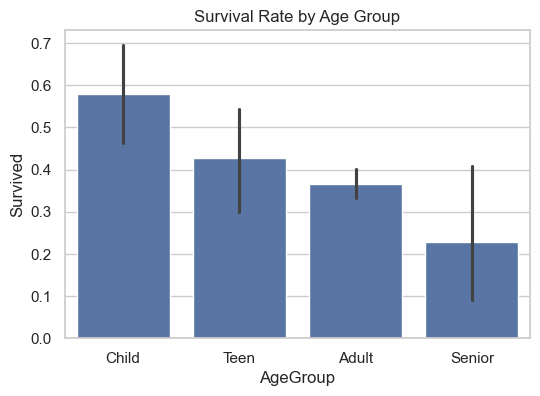

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x="AgeGroup", y="Survived", data=train, order=labels)
plt.title("Survival Rate by Age Group")
plt.show()

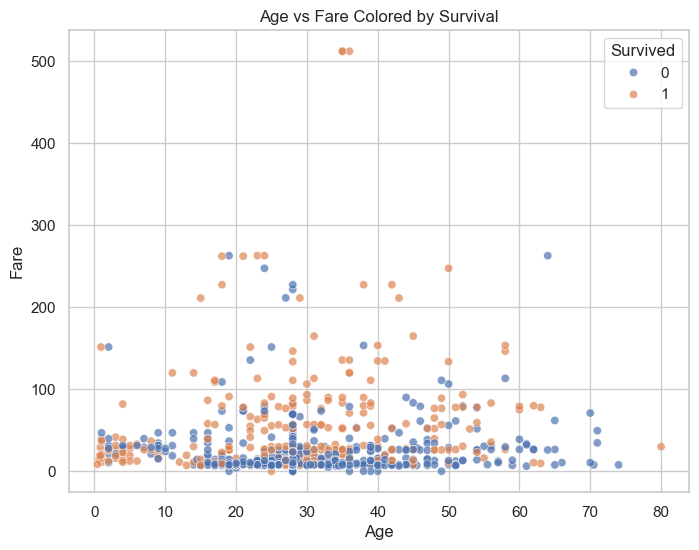

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=train, alpha=0.7)
plt.title("Age vs Fare Colored by Survival")
plt.show()

In [37]:
summary_table = train.groupby(['Sex', 'Pclass', 'AgeGroup']).agg(
Avg_Age=('Age', 'mean'),
Avg_Fare=('Fare', 'mean'),
Survival_Rate=('Survived', 'mean')
).reset_index()
summary_table

/var/folders/nj/kh48nbb16_l1xsk_12fz8v5c0000gn/T/ipykernel_88147/502648638.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = train.groupby(['Sex', 'Pclass', 'AgeGroup']).agg(


,Sex,Pclass,AgeGroup,Avg_Age,Avg_Fare,Survival_Rate
0,female,1,Child,2.000000,151.550000,0.000000
1,female,1,Teen,16.500000,125.066670,1.000000
2,female,1,Adult,35.827160,103.896914,0.975309
3,female,1,Senior,62.500000,78.979150,1.000000
4,female,2,Child,4.875000,30.353650,1.000000
5,female,2,Teen,16.166667,18.011800,1.000000
6,female,2,Adult,32.991935,21.271439,0.903226
7,female,2,Senior,NaN,NaN,NaN
8,female,3,Child,4.891304,21.748909,0.478261
9,female,3,Teen,16.325000,12.336050,0.550000


In [38]:
summary_table = train.groupby(['Sex', 'Pclass', 'AgeGroup']).agg(
    Avg_Age=('Age', 'mean'),
    Avg_Fare=('Fare', 'mean'),
    Survival_Rate=('Survived', 'mean')
).reset_index()

summary_md = summary_table.to_markdown(index=False)
print(summary_md)


| Sex    |   Pclass | AgeGroup   |   Avg_Age |   Avg_Fare |   Survival_Rate |
|:-------|---------:|:-----------|----------:|-----------:|----------------:|
| female |        1 | Child      |   2       |  151.55    |       0         |
| female |        1 | Teen       |  16.5     |  125.067   |       1         |
| female |        1 | Adult      |  35.8272  |  103.897   |       0.975309  |
| female |        1 | Senior     |  62.5     |   78.9792  |       1         |
| female |        2 | Child      |   4.875   |   30.3537  |       1         |
| female |        2 | Teen       |  16.1667  |   18.0118  |       1         |
| female |        2 | Adult      |  32.9919  |   21.2714  |       0.903226  |
| female |        2 | Senior     | nan       |  nan       |     nan         |
| female |        3 | Child      |   4.8913  |   21.7489  |       0.478261  |
| female |        3 | Teen       |  16.325   |   12.3361  |       0.55      |
| female |        3 | Adult      |  28.925   |   15.6458  |     

/var/folders/nj/kh48nbb16_l1xsk_12fz8v5c0000gn/T/ipykernel_88147/1597351036.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = train.groupby(['Sex', 'Pclass', 'AgeGroup']).agg(


In [48]:
from openai import OpenAI
import pandas as pd

client = OpenAI()

summary_table = pd.DataFrame({
    "Sex": ["female", "female", "male", "male"],
    "Pclass": [1, 1, 1, 1],
    "AgeGroup": ["Adult", "Senior", "Adult", "Senior"],
    "Avg_Age": [35.8, 62.5, 37.2, 66.3],
    "Avg_Fare": [103.9, 78.97, 66.15, 56.8],
    "Survival_Rate": [0.975, 1.0, 0.381, 0.0833]
})

summary_md = summary_table.to_markdown(index=False)

prompt = f"""
I have the following summary statistics of Titanic passengers:

{summary_md}

Please answer the following questions and write your response as a short natural-language report:

1. Which age group and class combination shows the largest gender disparity in survival?
2. Do passengers in lower classes have a consistently lower survival rate across all age groups?
3. Is there a correlation between average fare and survival rate within each age group?
4. Are there any passenger groups that survived despite paying low fares?
5. Does family size seem to affect survival rate? Which group benefited most from traveling with family?

Provide a concise, insightful report highlighting key trends, anomalies, and suggestions for further analysis.
"""

response = client.chat.completions.create(
    model="gpt-5-mini",
    messages=[
        {"role": "system", "content": "You are a data analyst. Provide concise, insightful reports."},
        {"role": "user", "content": prompt}
    ]
)

llm_report = response.choices[0].message.content
print(llm_report)


Report based on the provided Pclass‑1 summary (Adult and Senior, by sex)

1) Largest gender disparity in survival
- Senior passengers in 1st class show the largest gap: female survival = 1.00 vs male = 0.0833, a difference of ~0.917 (91.7 percentage points). Adults in 1st class also show a large gap (female 0.975 vs male 0.381, ≈0.594).

2) Survival by class (lower classes)
- Cannot answer from this summary: all rows are Pclass = 1. You need data for Pclass 2 and 3 to determine whether lower classes have consistently lower survival across age groups.

3) Correlation between average fare and survival within age groups
- Within each age group in this subset there is a positive association: the sex with the higher average fare (females) also has much higher survival for both Adults and Seniors. Caveat: this is a tiny, confounded sample (only 1st class, and sex is a major confounder), so this is not a robust estimate of correlation.

4) Any groups who survived despite paying low fares
- No